Python y google están conectados, llamemos a las librerias y conectemos nuestro drive


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from astropy.visualization import astropy_mpl_style, quantity_support
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Comencemos con una función y guardando los datos.
Para **números** hay dos tipos de variables principales, los números enteros (llamados int) y los reales (llamados float). El separador decimal que tenemos que usar es el punto.
Las variables que almacenan texto se denominan strings (str). Tienen que estar entre comillas sencillas(‘) o dobles («), o si el texto ocupa varias líneas, entre triples comillas dobles («»») .



In [26]:
numero1=int(2)
numero2=float(2.5)
print (numero1)
print (numero2)


2
2.5


Para una función Y(x), defino un arreglo de números en los que evaluaré la función, el rango de x. Por ejemplo, acá x varia entre 0 y 100, en pasos de 0.1.
y la función es $y(x) = 6x^2 - 3x -880$

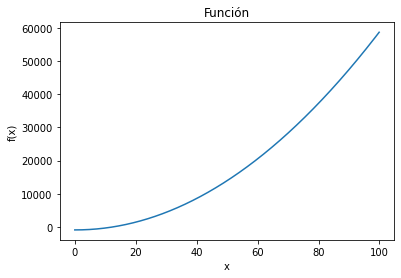

<Figure size 432x288 with 0 Axes>

In [27]:
#defino la función
x=np.arange(0,100,0.1)
y=6*x*x-3*x-880

#el gráfico plt
plt.plot(x,y)
plt.title('Función')
plt.ylabel('f(x)')
plt.xlabel('x')

#escritura del archivo, se escribe fila por fila
f = open("chuletita.txt", "w")
for x in np.arange(0,100,1):
        v=6*x*x-3*x-880
        f.write(str(x))
        f.write(" ")
        f.write(str(v))
        f.write('\n')

#Visualizo el gráfico
plt.show ()
#guardo la imagen en png
plt.savefig('xuleta.png')

Veamos el archivo chuletita.txt que creamos
Podemos abrirlo con np o con pandas
Este archivo está en nuestro drive

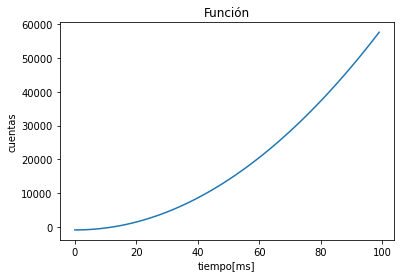

In [28]:
x, y = np.loadtxt('chuletita.txt', unpack=True)

plt.plot(x,y, label='Xuletita')

#cuando tengo barras de error x ex y ey
#plt.errorbar(x, y, yerr=erry, fmt=".-"

plt.xlabel('tiempo[ms]')
plt.ylabel('cuentas')
plt.title('Función')
#plt.yscale("log")
plt.show()

Ahora vamos a dibujar una curva de Lorentz
$L_{n}(x-a)=\frac{1}{\pi}\frac{n}{n^{2}+(x-a)^{2}} $ \\
Valores para a y n (0.2 y 10)

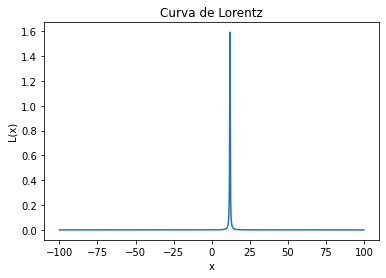

In [29]:
x=np.arange(-100,100,0.1)
L= (1/np.pi)*(0.2/(0.2*0.2 + (x-12)**2))

#el gráfico plt
plt.plot(x,L)
plt.title('Curva de Lorentz')
plt.ylabel('L(x)')
plt.xlabel('x')
plt.show ()

En esta celda se va a calcular $\int_{\alpha}^{\beta}L_n(x-a)dx$


In [41]:
x = sym.Symbol('x')
a=sym.integrate((1/np.pi)*(0.2/(0.2*0.2 + (x-5)**2)))
print(a)
sym.plot(a)
b=sym.limit(a, x, 0, '+')
sym.plot(b)

0.318309886183794*atan(5.00000000000005*x - 25.0000000000003)


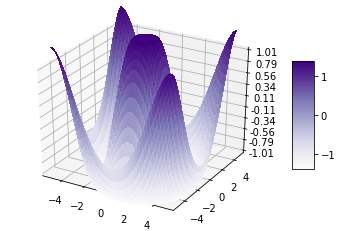

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# los datos
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R) + np.sin(R)

# graficar las superficie otro color viridis, surf, magma
# https://matplotlib.org/examples/color/colormaps_reference.html
surf = ax.plot_surface(X, Y, Z, cmap=cm.Purples, linewidth=0, antialiased=False)

# eje z 
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# barra de colores
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


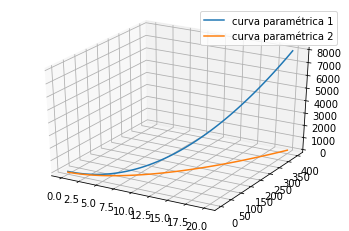

In [32]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
#defino el parametro
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
t = np.linspace(0, 20, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
#especifico la "trayectoria" x(r,theta),y(r, theta),z o w(vu)
x = t
y = t**2
z = t**3
w = theta*r
ax.plot(x, y, z, label='curva paramétrica 1')
ax.plot(x, y, w, label='curva paramétrica 2')
ax.legend()
